In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
test_1 = np.random.normal(20, 5, 100000)
test_2 = np.random.normal(40, 9, 100000)
test_3 = np.random.normal(60, 12, 100000)

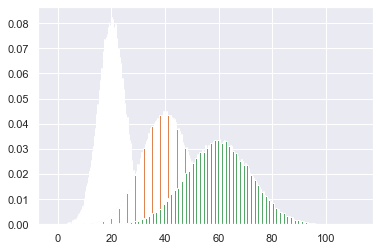

In [4]:
probas_1, values_1, _ = plt.hist(test_1, bins=200, density=True)
probas_2, values_2, _ = plt.hist(test_2, bins=200, density=True)
probas_3, values_3, _ = plt.hist(test_3, bins=200, density=True)

probas_1 = probas_1 / probas_1.sum()
probas_2 = probas_2 / probas_2.sum()
probas_3 = probas_3 / probas_3.sum()

In [5]:
a_1 = stats.rv_histogram([probas_1, values_1])
a_2 = stats.rv_histogram([probas_2, values_2])
a_3 = stats.rv_histogram([probas_3, values_3])

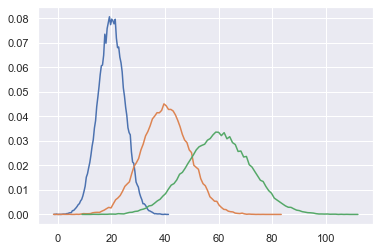

In [6]:
fig, ax = plt.subplots()

ax.plot(np.linspace(*a_1.support(), 100), a_1.pdf(np.linspace(*a_1.support(), 100)))
ax.plot(np.linspace(*a_2.support(), 100), a_2.pdf(np.linspace(*a_2.support(), 100)))
ax.plot(np.linspace(*a_3.support(), 100), a_3.pdf(np.linspace(*a_3.support(), 100)))

fig;

In [7]:
seller_1 = Seller(probas_1, values_1, wager=100)
seller_2 = Seller(probas_2, values_2, wager=100)
#seller_3 = Seller(probas_3, values_3, wager=100)

sellers = [seller_1, seller_2]

buyer = Buyer(probas_3, values_3, utility = 200)

market_1 = Market(sellers, buyer, task = 40)

MarketOperator.plot_forecasts(sellers)

ValueError: Expected length 2 for parameter histogram

In [12]:
market_1.sellers

NameError: name 'market_1' is not defined

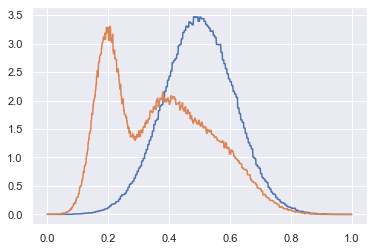

In [10]:
qa_forecast = MarketOperator.aggregation(sellers, type = 'QA', plot = True)
lop_forecast = MarketOperator.aggregation(sellers, type = 'LOP', plot = True)

In [11]:
supp = np.sort(np.concatenate([np.linspace(*seller.non_scaled_forecast_rv.support(), 1000) for seller in sellers]))

In [13]:
supp[0], supp[-1]

(-2.0945673173064776, 111.78998490713315)

In [15]:
task = 40
task = (40 - supp[0]) / (supp[-1] - supp[0])
task

0.3696249095693681

In [16]:
MarketOperator.scoring(seller_1.forecast_rv, task)

0.15062509884151323

In [17]:
MarketOperator.scoring(seller_2.forecast_rv, task)

0.018503857874093116

In [18]:
MarketOperator.scoring(seller_3.forecast_rv, task)

0.12026055108362416

In [21]:
MarketOperator.scoring(seller_2.forecast_rv, task) / MarketOperator.scoring(seller_3.forecast_rv, task)

0.15386473542122975

In [34]:
class Mine:
    def __init__(self, a) -> None:
        self.a = a

c = {1 : [1,2], 2: [3,4]}
b = Mine(c)

In [35]:
b.a

{1: [1, 2], 2: [3, 4]}

In [37]:
b.a[1] = [1,2,3]

In [38]:
b.a

{1: [1, 2, 3], 2: [3, 4]}

In [39]:
c

{1: [1, 2, 3], 2: [3, 4]}